(231, 430)
(994, 2000)


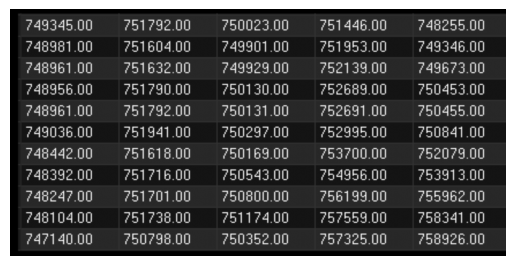

In [203]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('data/2025-01-22/1_top.png', cv2.IMREAD_GRAYSCALE)
print(img.shape)

(h, w) = img.shape[:2]
new_width = 2000
aspect_ratio = h / w - 0.04
new_height = int(new_width * aspect_ratio)
img_b = cv2.resize(img, (new_width, new_height))
print(img_b.shape)

# plt.imshow(img, cmap='gray')
# plt.axis('off')
# plt.show()
# plt.imshow(img, cmap='gray')
# plt.axis('off')
# plt.show()

plt.imshow(img_b, cmap='gray')
plt.axis('off')
plt.show()

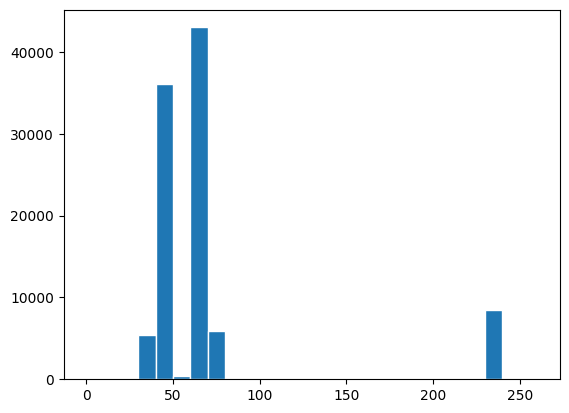

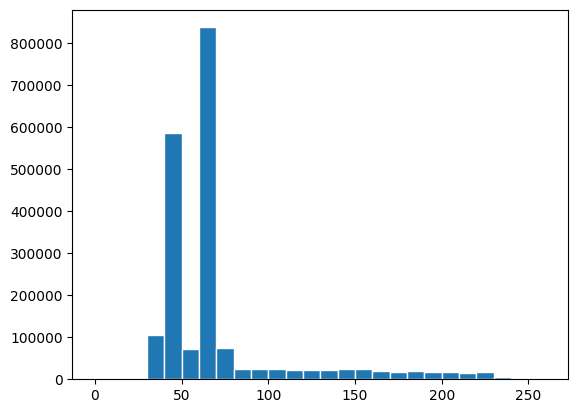

In [204]:
import numpy as np
plt.hist(np.array(img).flatten(), edgecolor='white', bins=np.arange(0,261,10))
plt.show()

plt.hist(np.array(img_b).flatten(), edgecolor='white', bins=np.arange(0,261,10))
plt.show()

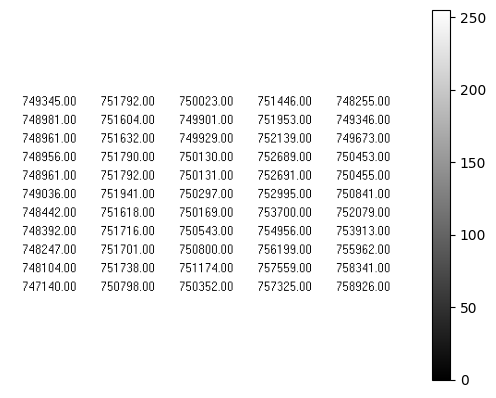

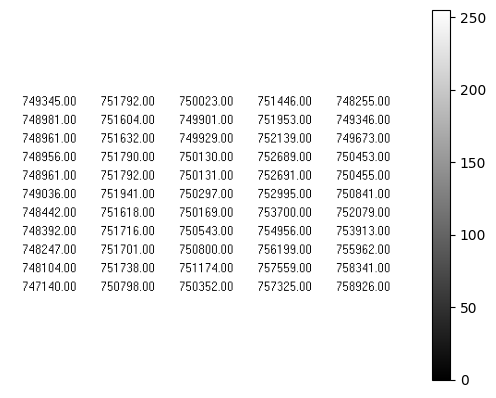

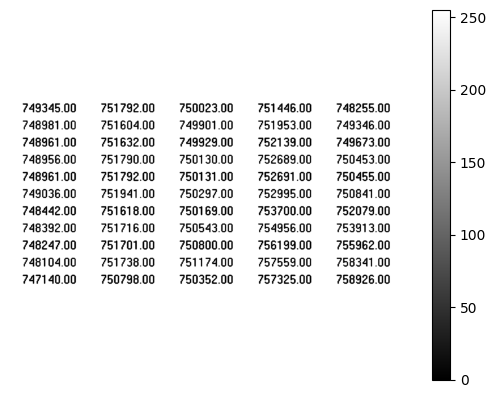

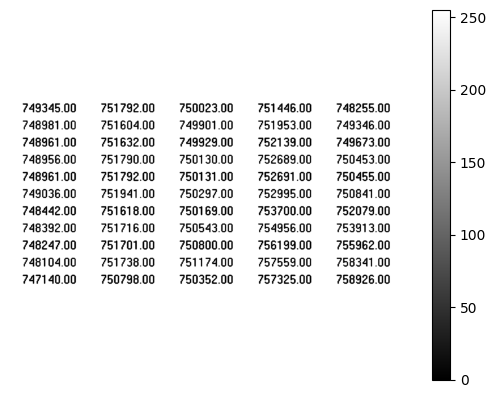

In [207]:
_, binary = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)
plt.imshow(binary, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()

# image sharpnening
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) 
sharp_img = cv2.filter2D(binary, -1, kernel) 
plt.imshow(sharp_img, cmap='gray') 
plt.colorbar()
plt.axis('off')
plt.show()

_, binary = cv2.threshold(img_b, 100, 255, cv2.THRESH_BINARY_INV)
plt.imshow(binary, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()

# image sharpnening
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) 
sharp_img = cv2.filter2D(binary, -1, kernel) 
plt.imshow(sharp_img, cmap='gray') 
plt.colorbar()
plt.axis('off')
plt.show()

In [208]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
custom_config = r'--oem 3 --psm 6 outputbase digits'

numbers = pytesseract.image_to_string(img, config=custom_config)
print(numbers)

numbers_b = pytesseract.image_to_string(img_b, config=custom_config)
print(numbers_b)

sharp_img = pytesseract.image_to_string(sharp_img, config=custom_config)
print(numbers_b)

74346.00751792.00750023.00761448.00748256.00
74961.00751804.00749907.00781983.00749346.00
74961.00751832.00749929.00762139.00749673.00
748956.00751790.00750730.00762889.00750453.00
748961.00751792.00750137.00762891.00750456.00
749036.00751941.00750297.00762996.00750841.00
748442.00751618.00750769.00783700.00752079.00
748392.00751716.00750543.00764966.00753913.00
748247.00751701.00750800.00788199.00755962.00
7410400751738.00751174.00767889.00758341.00
747140.00750798.00750952.00767326.00758926.00

749345.00 751792.00 750023.00 751446.00 746255.00
746981.00 751604.00 749901.00 751953.00 749346.00
748961.00 751632.00 749929.00 752139.00 749673.00
746956.00 751790.00 750130.00 752669.00 750453.00
748961.00 751792.00 750131.00 752691.00 750455.00
749036.00 751941.00 75029700 752995.00 750641.00
746442.00 751616.00 750169.00 753700.00 752079.00
7468392.00 751716.00 750543.00 754956.00 753913.00
46247.00 751701.00 750600.00 756199.00 755962.00
746104.00 751736.00 751174.00 757559.00 756341.00

In [91]:
numbers_list = numbers.split('\n')
temp = []
while '' in numbers_list:
    numbers_list.remove('') # remove the element resulted fom \n
for i in numbers_list:
    temp_elem = i.split('.00')
    while '' in temp_elem:
        temp_elem.remove('')
    temp.append(temp_elem)
temp

[['74346', '751792', '750023', '761448', '748256'],
 ['74961', '751804', '749907', '781983', '749346'],
 ['74961', '751832', '749929', '762139', '749673'],
 ['748956', '751790', '750730', '762889', '750453'],
 ['748961', '751792', '750137', '762891', '750456'],
 ['749036', '751941', '750297', '762996', '750841'],
 ['748442', '751618', '750769', '783700', '752079'],
 ['748392', '751716', '750543', '764966', '753913'],
 ['748247', '751701', '750800', '788199', '755962'],
 ['7410400751738', '751174', '767889', '758341'],
 ['747140', '750798', '750952', '767326', '758926']]

In [92]:
import math
def countDigit(n):
    return math.floor(math.log10(n)+1)
numbers_temp = []
for row in temp:
    row_temp = []
    if len(row)!=5:
        for row_elem in row:
            if countDigit(int(row_elem)) <=6:
                row_temp.append(row_elem)
            else:
                row_temp.extend(row_elem.split('00', maxsplit=5-len(row)))
        numbers_temp.append(row_temp)
    else: 
        numbers_temp.append(row)
numbers_temp

[['74346', '751792', '750023', '761448', '748256'],
 ['74961', '751804', '749907', '781983', '749346'],
 ['74961', '751832', '749929', '762139', '749673'],
 ['748956', '751790', '750730', '762889', '750453'],
 ['748961', '751792', '750137', '762891', '750456'],
 ['749036', '751941', '750297', '762996', '750841'],
 ['748442', '751618', '750769', '783700', '752079'],
 ['748392', '751716', '750543', '764966', '753913'],
 ['748247', '751701', '750800', '788199', '755962'],
 ['74104', '751738', '751174', '767889', '758341'],
 ['747140', '750798', '750952', '767326', '758926']]

In [94]:
# send an error message if digits of numbers in each row are different
numbers_digits = []
for row in numbers_temp:
    digits_temp = []
    for row_elem in row:
        digits_temp.append(countDigit(int(row_elem)))
    numbers_digits.append(digits_temp)
numbers_digits

[[5, 6, 6, 6, 6],
 [5, 6, 6, 6, 6],
 [5, 6, 6, 6, 6],
 [6, 6, 6, 6, 6],
 [6, 6, 6, 6, 6],
 [6, 6, 6, 6, 6],
 [6, 6, 6, 6, 6],
 [6, 6, 6, 6, 6],
 [6, 6, 6, 6, 6],
 [5, 6, 6, 6, 6],
 [6, 6, 6, 6, 6]]

In [98]:
def most_frequent(arr):
    return max(set(arr), key=arr.count)
    
for idx, row in enumerate(numbers_digits):
    frq = most_frequent(row)
    for idx2, row_elem in enumerate(row):
        if row_elem != frq:
            print(f'digit mismatch at {idx}{idx2}')

digit mismatch at 00
digit mismatch at 10
digit mismatch at 20
digit mismatch at 90


In [85]:
import math
def countDigit(n):
    return math.floor(math.log10(n)+1)

test = ['748961', '7516320074992900752139', '749673']
temp = []
if len(test)!=5:
    for i in test:
        if countDigit(int(i)) <= 6:
            temp.append(i)
        else:
            temp.extend(i.split('00'))

temp

['748961', '751632', '749929', '752139', '749673']

In [71]:
def readNumbers(img):
    # apply a threshold to increase accuracy
    _, binary = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)
    numbers = pytesseract.image_to_string(binary, config=custom_config)
    numbers_list = numbers.split('\n')
    while '' in numbers_list:
        numbers_list.remove('') # remove the element resulted fom \n
    return numbers_list

def readNumbers_b(img):
    # apply a threshold to increase accuracy
    _, binary = cv2.threshold(img, 90, 255, cv2.THRESH_BINARY_INV)
    numbers = pytesseract.image_to_string(binary, config=custom_config)
    numbers_list = numbers.split('\n')
    while '' in numbers_list:
        numbers_list.remove('') # remove the element resulted fom \n
    return numbers_list
    
def fillRows(numbers_list):
    rows = []
    for idx, val in enumerate(numbers_list):
        rows.append(val.split('00'))
    for idx, val in enumerate(rows):
        if len(val) != 6: # replaced with regex
            rows[idx] = re.findall(r'[-+]?\d+\.00', numbers_list[idx])            
        while '' in val:
            val.remove('')
        rows[idx] = list(map(float, rows[idx]))
    for i in range(len(rows)):
        for j in range(len(rows[i])):
            rows[i][j] = abs(rows[i][j])
    return rows

In [72]:
import re
import pandas as pd
print(pd.DataFrame(fillRows(readNumbers(img))))

           0         1         2         3         4
0    74346.0  751792.0  750023.0  781448.0  748255.0
1       71.0  751804.0  749907.0  781983.0  749346.0
2    74961.0  751632.0  749929.0  782139.0  749673.0
3    74966.0  751790.0  750730.0  762889.0  750453.0
4   748961.0  751792.0  750137.0  782891.0  750456.0
5   749036.0  751941.0  750297.0  762996.0   75084.0
6   748442.0  751618.0  750769.0  783700.0  752079.0
7   748392.0  751716.0  750543.0  784968.0  753913.0
8   748247.0  751701.0  750800.0  788199.0  755962.0
9    74104.0  751738.0  751174.0  787889.0  758341.0
10  747140.0  750798.0  750952.0  787326.0  758926.0


In [73]:
print(pd.DataFrame(fillRows(readNumbers_b(img_b))))

           0          1         2             3         4
0   749345.0   751792.0  750023.0  7.514460e+05  748255.0
1   746981.0   751604.0  749901.0  7.519530e+05  749346.0
2   748961.0   751632.0  749929.0  7.521390e+05  749673.0
3   746956.0   751790.0  750130.0  7.526890e+05  750453.0
4   748961.0  8751792.0  750131.0  7.526910e+05  750455.0
5   749036.0   751941.0  750297.0  7.529950e+05  750841.0
6   746442.0  8751618.0  750169.0  7.537000e+13       NaN
7   748392.0   751716.0  750543.0  7.549560e+05  753913.0
8   748247.0   751701.0  750800.0  7.561990e+05  755962.0
9   746104.0  7517738.0  751174.0  7.575590e+05  758341.0
10  747140.0   750798.0  750352.0  7.573250e+05  758926.0


In [106]:
numbers_list = numbers.split('\n')

while '' in numbers_list:
    numbers_list.remove('')
numbers_list

['257337.00262627.00-26945400273462.00275523.00',
 '25820200288579.00271091.00272972.00271908.00',
 '258586.00288984.00271852.00271773.00-270564.00',
 '25809400267592.00273765.00272947.00268621.00',
 '257738.00288625.00279212.00272004.00-268511.00',
 '253767.00284245.00271082.00288271.00266151.00',
 '747909.00756451.00760077.00788698.00599015.00',
 '747866.00756325.00759827.00788231.00750377.00',
 '747537.00755890.00758527.00764307.00748523.00',
 '-3407.00-457.00 -336800-1598.00-2287.00',
 '749050.00755013.00756818.00764301.00749574.00',
 '1330.00 1023.001653.00 706.00 1138.00']

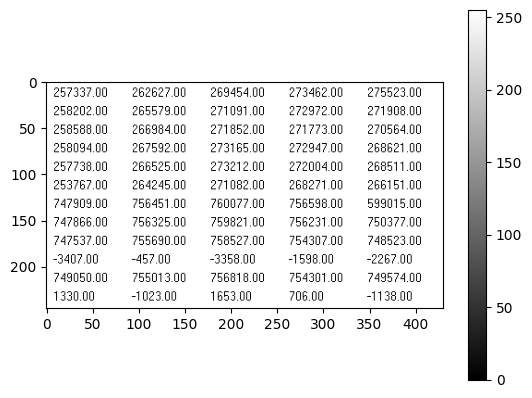

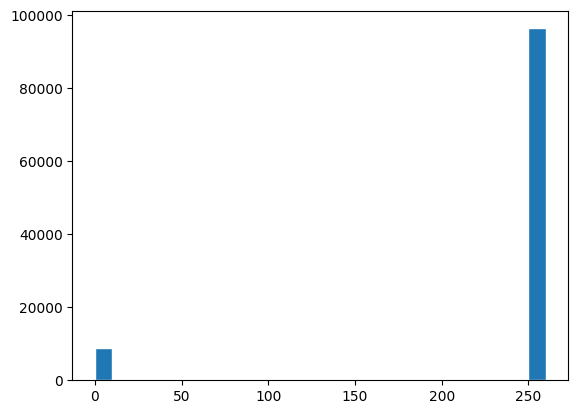

In [107]:
_, binary = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV)
plt.imshow(binary, cmap='gray')
plt.colorbar()
plt.show()

plt.hist(np.array(binary).flatten(), edgecolor='white', bins=np.arange(0,261,10))
plt.show()

In [113]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

custom_config = r'--oem 3 --psm 6 outputbase digits'
numbers = pytesseract.image_to_string(binary, config=custom_config)
numbers

'257337.00262627.00-26945400-273462.00275523.00\n258202.00288579.00271091.00272972.00271908.00\n258586.00268984.00271852.00271773.00-270864.00\n25809400267592.00273165.00272947.00268621.00\n257738.00288625.00279212.00272004.00-268511.00\n259767.00284245.00271082.00288271.00266151.00\n77.00756451.00760077.00788698.00599015.00\n747866.00758325.00759827.00788231.00750377.00\n747637.00755890.00758527.00784307.00748523.00\n-3407.00-487.00 335800-1598.00-2267.00\n749060.00755013.00756818.00784301.00749574.00\n1330.00 1023.001853.00 706.00 1138.00\n'

In [114]:
numbers_list = numbers.split('\n')

while '' in numbers_list:
    numbers_list.remove('')
numbers_list

['257337.00262627.00-26945400-273462.00275523.00',
 '258202.00288579.00271091.00272972.00271908.00',
 '258586.00268984.00271852.00271773.00-270864.00',
 '25809400267592.00273165.00272947.00268621.00',
 '257738.00288625.00279212.00272004.00-268511.00',
 '259767.00284245.00271082.00288271.00266151.00',
 '77.00756451.00760077.00788698.00599015.00',
 '747866.00758325.00759827.00788231.00750377.00',
 '747637.00755890.00758527.00784307.00748523.00',
 '-3407.00-487.00 335800-1598.00-2267.00',
 '749060.00755013.00756818.00784301.00749574.00',
 '1330.00 1023.001853.00 706.00 1138.00']

In [124]:
import re
row = []
len
for i in range(len(numbers_list)):
    row.append(re.findall(r'[-+]?\d+\.00', numbers_list[i]))
    
    # temp = [] # initiate the temp for every row
    # if len(row[i]) != 5: # when something's wrong
    #     for j in row[i]:
    #         temp.extend(elem.split('00'))
    #     while '' in temp:
    #         temp.remove('')
    #     row.append(list(map(float, temp)))
row

[['257337.00', '262627.00', '-273462.00', '275523.00'],
 ['258202.00', '288579.00', '271091.00', '272972.00', '271908.00'],
 ['258586.00', '268984.00', '271852.00', '271773.00', '-270864.00'],
 ['25809400267592.00', '273165.00', '272947.00', '268621.00'],
 ['257738.00', '288625.00', '279212.00', '272004.00', '-268511.00'],
 ['259767.00', '284245.00', '271082.00', '288271.00', '266151.00'],
 ['77.00', '756451.00', '760077.00', '788698.00', '599015.00'],
 ['747866.00', '758325.00', '759827.00', '788231.00', '750377.00'],
 ['747637.00', '755890.00', '758527.00', '784307.00', '748523.00'],
 ['-3407.00', '-487.00', '-1598.00', '-2267.00'],
 ['749060.00', '755013.00', '756818.00', '784301.00', '749574.00'],
 ['1330.00', '1023.00', '1853.00', '706.00', '1138.00']]

MemoryError: 

In [ ]:
test = ['25809400267592.00', '273165.00', '272947.00', '268621.00']
if len(test) !=5: # corret errors
    for idx, elem in enumerate(test):
        test.insert(idx, np.array(elem.split('00').flatten())
test

In [ ]:
for idx, val in enumerate(numbers_list):
    if len(val) != 5:
        for 
    row.append(val.split('00'))

In [127]:
row = []
for idx, val in enumerate(numbers_list):
    row.append(val.split('00'))
row

[['257337.', '262627.', '-269454', '-273462.', '275523.', ''],
 ['258202.', '288579.', '271091.', '272972.', '271908.', ''],
 ['258586.', '268984.', '271852.', '271773.', '-270864.', ''],
 ['258094', '267592.', '273165.', '272947.', '268621.', ''],
 ['257738.', '288625.', '279212.', '272', '4.', '-268511.', ''],
 ['259767.', '284245.', '271082.', '288271.', '266151.', ''],
 ['77.', '756451.', '76', '77.', '788698.', '599015.', ''],
 ['747866.', '758325.', '759827.', '788231.', '750377.', ''],
 ['747637.', '755890.', '758527.', '784307.', '748523.', ''],
 ['-3407.', '-487.', ' 3358', '-1598.', '-2267.', ''],
 ['749060.', '755013.', '756818.', '784301.', '749574.', ''],
 ['1330.', ' 1023.', '1853.', ' 706.', ' 1138.', '']]

In [132]:
rows = []
for idx, val in enumerate(numbers_list):
    rows.append(val.split('00'))
for idx, val in enumerate(rows):
    if len(val) != 6: # replaced with regex
        rows[idx] = re.findall(r'[-+]?\d+\.00', numbers_list[idx])
    while '' in val:
        val.remove('')
    rows[idx] = list(map(float, rows[idx]))
rows

[[257337.0, 262627.0, -269454.0, -273462.0, 275523.0],
 [258202.0, 288579.0, 271091.0, 272972.0, 271908.0],
 [258586.0, 268984.0, 271852.0, 271773.0, -270864.0],
 [258094.0, 267592.0, 273165.0, 272947.0, 268621.0],
 [257738.0, 288625.0, 279212.0, 272004.0, -268511.0],
 [259767.0, 284245.0, 271082.0, 288271.0, 266151.0],
 [77.0, 756451.0, 760077.0, 788698.0, 599015.0],
 [747866.0, 758325.0, 759827.0, 788231.0, 750377.0],
 [747637.0, 755890.0, 758527.0, 784307.0, 748523.0],
 [-3407.0, -487.0, 3358.0, -1598.0, -2267.0],
 [749060.0, 755013.0, 756818.0, 784301.0, 749574.0],
 [1330.0, 1023.0, 1853.0, 706.0, 1138.0]]

In [ ]:
rows[idx] = list(map(float, rows[idx]))

In [133]:
test = [-1, 2]
abs(test)

TypeError: bad operand type for abs(): 'list'

In [210]:
import pandas as pd
pd.DataFrame(pd.read_csv('data/2025-01-23/1_top.csv', index_col='cm'))

,W2,W1,C,E1,E2
cm,,,,,
5,749345,751792,750023,751446,748255
6,748981,9751604,749901,751953,749346
7,748961,751632,749929,752139,749673
8,746956,9751790,750130,752689,750453
9,748961,751792,750131,752691,750455
10,749036,751941,750297,752995,750841
11,748442,751618,750169,753700,752079
12,748392,751716,750543,754956,753913
13,748247,751701,750800,756199,755962


In [ ]:
from tkinter import *
from matplotlib.figure import Figure 
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk) 

# plot function is created for 
# plotting the graph in 
# tkinter window 
def plot(): 

	# the figure that will contain the plot 
	fig = Figure(figsize = (5, 5), 
				dpi = 100) 

	# list of squares 
	y = [i**2 for i in range(101)] 

	# adding the subplot 
	plot1 = fig.add_subplot(111) 

	# plotting the graph 
	plot1.plot(y) 

	# creating the Tkinter canvas 
	# containing the Matplotlib figure 
	canvas = FigureCanvasTkAgg(fig, 
							master = window) 
	canvas.draw() 

	# placing the canvas on the Tkinter window 
	canvas.get_tk_widget().pack() 

	# creating the Matplotlib toolbar 
	toolbar = NavigationToolbar2Tk(canvas, 
								window) 
	toolbar.update() 

	# placing the toolbar on the Tkinter window 
	canvas.get_tk_widget().pack() 

# the main Tkinter window 
window = Tk() 

# setting the title 
window.title('Plotting in Tkinter') 

# dimensions of the main window 
window.geometry("500x500") 

# button that displays the plot 
plot_button = Button(master = window, 
					command = plot, 
					height = 2, 
					width = 10, 
					text = "Plot") 

# place the button 
# in main window 
plot_button.pack() 

# run the gui 
window.mainloop() 
